In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm
print(tf.__version__)


2.12.0


In [3]:
dataset,metadata=tfds.load("fashion_mnist",as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset["train"],dataset["test"]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete0XU2H9/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete0XU2H9/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

In [6]:
print(num_train_examples)
print(num_test_examples)

60000
10000


# PreProcess the data


In [7]:
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return images,labels

In [8]:
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

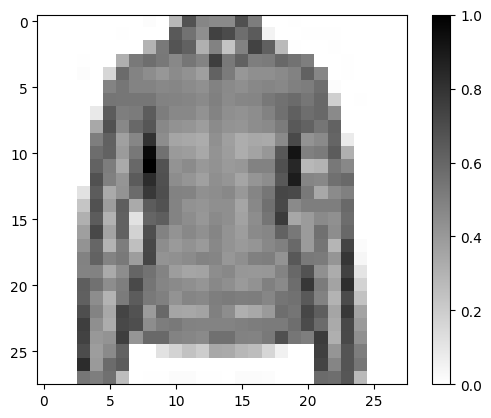

In [9]:
for image,label in test_dataset.take(1):
  break
  image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

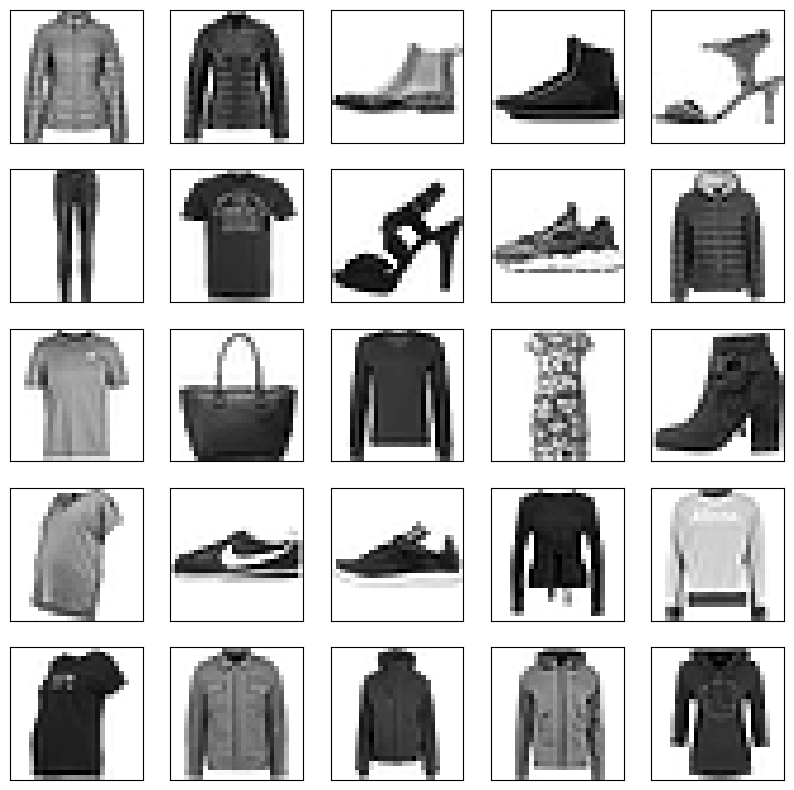

In [10]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  i+=1
plt.show()


In [11]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
BS=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BS)
test_dataset=test_dataset.batch(BS)


In [14]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BS))

Epoch 1/5
1875/1875 [==============================] - 21s 6ms/step - loss: 0.4919 - accuracy: 0.8268
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3745 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3326 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3095 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2947 - accuracy: 0.8918


In [15]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 3s 8ms/step - loss: 0.3462 - accuracy: 0.8753


In [16]:
print(test_accuracy)

0.8752999901771545


In [17]:
for test_images,test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

1/1 [==============================] - 0s 154ms/step


In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([3.9230043e-05, 2.8493196e-07, 6.0755527e-03, 4.0824139e-06,
       9.5865315e-01, 1.1313884e-09, 3.5223123e-02, 2.2557442e-10,
       4.6255132e-06, 6.5850627e-09], dtype=float32)

In [20]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4

In [22]:
#verify the predictions
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_predict = class_names[np.argmax(predictions[3])]
y_predict


'Sneaker'

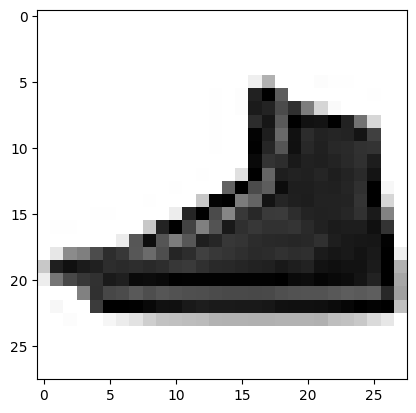

In [24]:
img = test_images[3]
plt.imshow(img, cmap='Greys')
